# Google Colab 데이터 로드

In [1]:
#Step 1. 구글 코랩에 한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,404 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126333 files and dire

In [4]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
study = pd.read_csv(io.BytesIO(myfile['공부시간과시험점수.csv']),
                       encoding='cp949')
study

Saving 공부시간과시험점수.csv to 공부시간과시험점수.csv


,이름,공부시간,시험점수
0,이원재,15.0,85.0
1,맹승주,14.5,86.5
2,안미경,14.0,86.0
3,서진수,13.5,85.5
4,황경인,13.0,85.0
5,신운무,12.0,83.0
6,권율,12.0,85.0
7,강준,11.0,82.0
8,신사임당,11.0,83.0
9,문무왕,10.5,82.0


# 로컬 데이터 로드

In [6]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
study = pd.read_csv('공부시간과시험점수.csv',encoding='cp949')
study

,이름,공부시간,시험점수
0,이원재,15.0,85.0
1,맹승주,14.5,86.5
2,안미경,14.0,86.0
3,서진수,13.5,85.5
4,황경인,13.0,85.0
5,신운무,12.0,83.0
6,권율,12.0,85.0
7,강준,11.0,82.0
8,신사임당,11.0,83.0
9,문무왕,10.5,82.0


# 공통 실습 코드

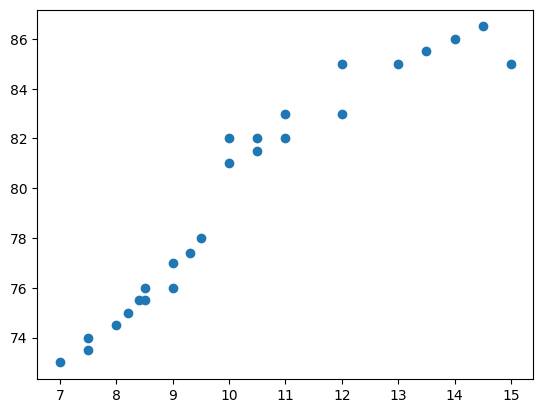

In [7]:
# data, target 정의
data = study['공부시간']
target = study['시험점수']

# 산점도 그리기
import matplotlib.pyplot as plt
plt.plot(data,target,'o')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

# train, test 데이터 나누기 위해 numpy로 변경
data = study['공부시간'].to_numpy()
target = study['시험점수'].to_numpy()

# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(data,target,test_size = 0.2, random_state = 40)
훈련용_data, 테스트용_data, 훈련용_target, 테스트용_target = train_test_split(data, target, test_size=0.2, random_state=40)

In [14]:
# shape 확인
훈련용_data.shape

(20,)

In [26]:
# data 전체 확인
#X_train
훈련용_data

array([[13.5],
       [ 8. ],
       [14. ],
       [10. ],
       [ 8.5],
       [13. ],
       [11. ],
       [ 9. ],
       [ 7.5],
       [ 8.2],
       [15. ],
       [10.5],
       [10.5],
       [ 7.5],
       [10. ],
       [14.5],
       [ 8.5],
       [12. ],
       [11. ],
       [12. ]])

In [16]:
# reshape 함수에 -1을 넣으면, rows은 자동으로 입력해달라는 뜻
# 즉, column을 1개로 내가 정했으니, 남은 데이터는 알아서 row에 잘 넣어주세요.
훈련용_data = 훈련용_data.reshape(-1,1)
테스트용_data = 테스트용_data.reshape(-1,1)

In [17]:
# shape 확인
훈련용_data.shape

(20, 1)

In [18]:
# data 전체 확인
훈련용_data

array([[13.5],
       [ 8. ],
       [14. ],
       [10. ],
       [ 8.5],
       [13. ],
       [11. ],
       [ 9. ],
       [ 7.5],
       [ 8.2],
       [15. ],
       [10.5],
       [10.5],
       [ 7.5],
       [10. ],
       [14.5],
       [ 8.5],
       [12. ],
       [11. ],
       [12. ]])

In [27]:
# 선형회귀모델 학습\
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(훈련용_data, 훈련용_target)

LinearRegression()

In [28]:
# 점수 확인(lr.score는 결정계수R2에 대한 정확도를 의미합니다.)
print(lr.score(훈련용_data , 훈련용_target))
print(lr.score(테스트용_data , 테스트용_target))

0.886911457690887
0.8367662584885625


In [29]:
# 16이라는 값을 넣었을 때 예상 결과값 확인
lr.predict([[16]])

array([90.12423029])

In [30]:
# 회귀계수 확인
print(lr.coef_ , lr.intercept_)

[1.80042161] 61.31748460585439


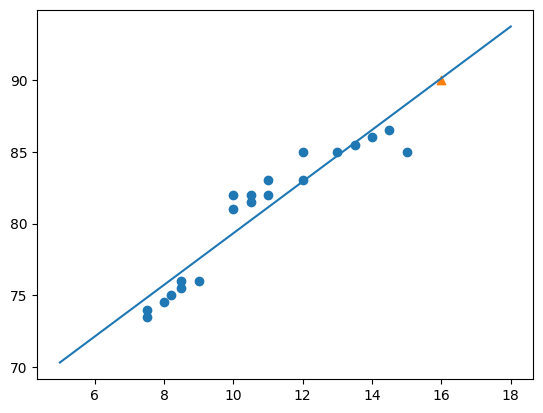

In [31]:
import matplotlib.pyplot as plt
plt.scatter(훈련용_data , 훈련용_target)
plt.plot( [5,18], [5*lr.coef_ +lr.intercept_ ,
                    18*lr.coef_ + lr.intercept_])
plt.scatter(16 , 90 ,marker="^")
plt.show()

## 다항회귀분석 적용

In [32]:
# 다항회귀분석 적용
import numpy as np

#특성공학 -> X_train가지고 제곱을 해서 새로운 feature 생성
훈련용_data_poly = np.column_stack(( 훈련용_data ** 2, 훈련용_data))
테스트용_data_poly = np.column_stack((테스트용_data ** 2 , 테스트용_data))

lr = LinearRegression()
lr.fit(훈련용_data_poly , 훈련용_target)
lr.score(테스트용_data_poly , 테스트용_target)

0.5052713132458149

In [ ]:
lr.predict([[16**2,16]])

In [ ]:
print(lr.score(훈련용_data_poly , 훈련용_target))
print(lr.score(테스트용_data_poly , 테스트용_target))